In [1]:
import pandas as pd
import numpy as np
from matplotlib import colors
from matplotlib import rc
import matplotlib.pyplot as plt

from matplotlib import rcParams

latex_path = '/usr/local/texlive/2023/bin/universal-darwin'

rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}\usepackage{{amsfonts}}\usepackage{{amssymb}}'
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern Roman']
rcParams['mathtext.fontset'] = 'cm'
csv = 'CSV_Files/CCHU_Filters'
images = 'Images/CCHU_Filters'

In [2]:

file_name = 'CCHU_NIRS.xlsx'
df = pd.read_excel(file_name)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
df = df[['Subject_ID','probe', 'Block1 (S1)' ,'Filter Used for Block 1 (S1)','Block2 (S1)','Filter Used for Block 2 (S1)','Block1 (S2)','Filter Used for Block 1 (S2)', 'Block2 (S2)',
                'Filter Used for Block 2 (S2)', 'Block1 (S3)','Filter Used for Block 1 (S3)', 'Block2 (S3)','Filter Used for Block 2 (S3)']]

In [4]:
df

,Subject_ID,probe,Block1 (S1),Filter Used for Block 1 (S1),Block2 (S1),Filter Used for Block 2 (S1),Block1 (S2),Filter Used for Block 1 (S2),Block2 (S2),Filter Used for Block 2 (S2),Block1 (S3),Filter Used for Block 1 (S3),Block2 (S3),Filter Used for Block 2 (S3)
0,NC301,CCHUNB6A,1084.0,0.3,2103.0,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NC301,CCHUNB6A,1084,0.5,2103,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NC302,CCHUNB6A,1084,0.3,2103,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NC302,CCHUNB6A,1084,0.3,2103,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NC303,CCHUNB6A,1084,0.3,2103,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,NE300,CCHUNB6A,1084,0.2,2103,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2344,NE300,CCHUNB6A,1084,0.3,2103,0.3,1084,0.3,2103,0.4,NaN,NaN,NaN,NaN
2345,NE300,CCHUNB6A,1084,0.3,2103,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2346,NE300,CCHUNB6A,1084,0.3 Good for A & B; No Filter Good for C & D,2103,0.3 Good for A & B; No Filter Good for C & D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def setting_full_bins(float_array):

    total_bins = np.round(np.arange(0.1,1.1,0.1),3)
    unique_values, counts = np.unique(float_array, return_counts=True)
    counts =  np.append(counts,np.zeros(len(total_bins)- len(unique_values)))
    unique_values =  np.append(unique_values,np.zeros(len(total_bins)- len(unique_values)))
    unique_values = np.round(unique_values,3)

    indxes = np.arange(0,10,1)

    for l in range(0,len(indxes)):
        if unique_values[l] == total_bins[l]:
            pass
        else: 
            unique_values = np.insert(unique_values, l, total_bins[l]); 
            unique_values =  unique_values[:-1]
            counts = np.insert(counts, l, 0); 
            counts =  counts[:-1]

    return counts, total_bins

In [6]:
# Function for identifying how many rows have the D distance and extracting that value, filtering A, B and C distances. 

def extracting_and_filtering(df, block_session, block, column):
    df_block = (df[df[block_session]== block])
    df_block_f = df_block.copy(); index_of_row = df_block_f.index.tolist()
    rejected_elements = []
    found_number = False
    for i,f in zip(index_of_row,df_block_f[column]): 
        try:
            if any(letter in f for letter in ['A', 'B', 'C','D']):

                if 'D' in f:
                    found_number = False
                    try: 
                        index = f.index(' D')
                    except:
                        try: 
                            index = f.index('CD')
                        except: 
                            index = f.index(',D')
                        
                    while found_number == False:
                        if any(char in f[index-3:index] for char in ['No', 'NO', 'no',]):
                            found_number = True
                            df_block_f[column][i] = np.nan
                            rejected_elements = np.append(rejected_elements,str(i) +' '+f)
                        elif any(number in f[index-3:index] for number in ['1.','0.']):
                            found_number = True
                            #print(fr'Element {i}  :  {f} -- extracted value:  {f[index-3:index]}')
                            df_block_f[column][i] = float(f[index-3:index])
                        else: index = index - 1 
                    
                else: 
                    rejected_elements = np.append(rejected_elements,str(i) +' '+f)
                    df_block_f[column][i] = np.nan

            elif ';' in f:
                df_block_f[column][i] = np.nan
                rejected_elements = np.append(rejected_elements,str(i) +' '+f)


        except: 
            pass
    
    df_block_f = df_block_f.dropna(subset=[column])
    return df_block_f, rejected_elements



# Session 1

In [7]:
session =1

## Block 1

In [8]:
print('Different block names for Block 1 (S1)')
print(df['Block1 (S1)'].unique())
df.loc[df['Block1 (S1)'] == '1084', 'Block1 (S1)'] = float(1084)
df.loc[df['Block1 (S1)'] == '2101', 'Block1 (S1)'] = float(2101)
df.loc[df['Block1 (S1)'] == '2102', 'Block1 (S1)'] = float(2102)
df = df[df['Block1 (S1)'] != '-']; df = df[df['Block1 (S1)'] != '-8'];
print('')
print('Condensed Block Names for Block 1 (S1)')
print(df['Block1 (S1)'].unique())


Different block names for Block 1 (S1)
[1084.0 '1084' nan 2101.0 2102.0 '2101' '2102' 2103.0 '-' '-8']

Condensed Block Names for Block 1 (S1)
[1084.0 nan 2101.0 2102.0 2103.0]


In [9]:
for b in df['Block1 (S1)'].unique():
    print('Block name '+str(b) + ' has '+str(len(df[df['Block1 (S1)']==b])) + ' rows')


Block name 1084.0 has 2282 rows
Block name nan has 0 rows
Block name 2101.0 has 29 rows
Block name 2102.0 has 8 rows
Block name 2103.0 has 1 rows


In [10]:
#pd.reset_option('display.max_rows')
#pd.set_option('display.max_rows', None)

## 1084

In [11]:
df_b1_1084_f, rejected_elements = extracting_and_filtering(df,'Block1 (S1)',1084,'Filter Used for Block 1 (S1)')
print(fr"{len(rejected_elements)} rows were filtered for the block 1084")

42 rows were filtered for the block 1084


In [12]:
df_b1_1084_f

,Subject_ID,probe,Block1 (S1),Filter Used for Block 1 (S1),Block2 (S1),Filter Used for Block 2 (S1),Block1 (S2),Filter Used for Block 1 (S2),Block2 (S2),Filter Used for Block 2 (S2),Block1 (S3),Filter Used for Block 1 (S3),Block2 (S3),Filter Used for Block 2 (S3)
0,NC301,CCHUNB6A,1084.0,0.3,2103.0,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NC301,CCHUNB6A,1084.0,0.5,2103,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NC302,CCHUNB6A,1084.0,0.3,2103,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NC302,CCHUNB6A,1084.0,0.3,2103,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NC303,CCHUNB6A,1084.0,0.3,2103,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,NE300,CCHUNB6A,1084.0,0.5,2103,0.6,1084,0.9; 0.6,2103,1.0; 0.8,NaN,NaN,NaN,NaN
2343,NE300,CCHUNB6A,1084.0,0.2,2103,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2344,NE300,CCHUNB6A,1084.0,0.3,2103,0.3,1084,0.3,2103,0.4,NaN,NaN,NaN,NaN
2345,NE300,CCHUNB6A,1084.0,0.3,2103,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Manual Processing of Data for 1084

In [13]:
index_of_row = df_b1_1084_f.index.tolist()
for i in index_of_row: 
    if any(char in str(df_b1_1084_f['Filter Used for Block 1 (S1)'][i]) for char in ['-8', '3.0']):
        print(fr"index: {i}")
        print(fr"{df_b1_1084_f['Filter Used for Block 1 (S1)'][i]}")



index: 303
-8


#### Looking for the exceptions

In [14]:

index_of_row = df_b1_1084_f.index.tolist()

for i in index_of_row: 
    try:
        if any(char in df_b1_1084_f['Filter Used for Block 1 (S1)'][i] for char in ['nd', '/','No Filter','No filter', ',','..',"'0.4'"]):
            print(fr"index {i}: {df_b1_1084_f['Filter Used for Block 1 (S1)'][i]}")
    except:
        pass

    


index 78: 0.4 nd
index 829: 0.3 for first block msmt,0.2 for second
index 834: 1.1/0.7
index 973: No filter
index 1100: No filters noted
index 1496: 0.7, 0.4
index 1518: 0.4 nd
index 1530: 0..9
index 1781: No Filter
index 1800: No Filter
index 1959: 0.7, 0.3
index 1978: 0.3 nd
index 2269: 0.2 nd


In [15]:
df_b1_1084_f['Filter Used for Block 1 (S1)'][78] = 0.4
df_b1_1084_f['Filter Used for Block 1 (S1)'][829] = 0.3
df_b1_1084_f['Filter Used for Block 1 (S1)'][1518] = 0.3
df_b1_1084_f['Filter Used for Block 1 (S1)'][1530] = 0.9
df_b1_1084_f['Filter Used for Block 1 (S1)'][1978] = 0.3
df_b1_1084_f['Filter Used for Block 1 (S1)'][2269] = 0.2
df_b1_1084_f['Filter Used for Block 1 (S1)'][2083] = 0.4

#Deleting Values
df_b1_1084_f = df_b1_1084_f.drop(2309)
df_b1_1084_f = df_b1_1084_f.drop(1959)
df_b1_1084_f = df_b1_1084_f.drop(1800)
df_b1_1084_f = df_b1_1084_f.drop(1781)
df_b1_1084_f = df_b1_1084_f.drop(1729)
df_b1_1084_f = df_b1_1084_f.drop(1496)
df_b1_1084_f = df_b1_1084_f.drop(1100)
df_b1_1084_f = df_b1_1084_f.drop(973)
df_b1_1084_f = df_b1_1084_f.drop(834)
df_b1_1084_f = df_b1_1084_f.drop(303)


index_of_row = df_b1_1084_f.index.tolist()

In [16]:
# Checking if all of values are numbers
errors = False
for i in index_of_row: 
    try:
        float(df_b1_1084_f['Filter Used for Block 1 (S1)'][i])
    except:
        print(fr"index {i} can't be converted to float its value is {df_b1_1084_f['Filter Used for Block 1 (S1)'][i]}")
        errors = True

if errors: pass
else: 
    df_b1_1084_f['Filter Used for Block 1 (S1)'] = df_b1_1084_f['Filter Used for Block 1 (S1)'].astype(float)
    print('All of the values are numbers and they are now in float format for 1084')
    file_name = 'block1_s1_10841.csv'
    print(fr"This dataframe was stored as {file_name}")
    df_b1_1084_f.to_csv(fr"{csv}/Block_1/{file_name}",index=False)





All of the values are numbers and they are now in float format for 1084
This dataframe was stored as block1_s1_10841.csv


In [17]:
total_bins = np.round(np.arange(0.1,1.1,0.1),3)
counts_1084, bins_1084 = setting_full_bins(np.array(df_b1_1084_f['Filter Used for Block 1 (S1)']).astype(float))

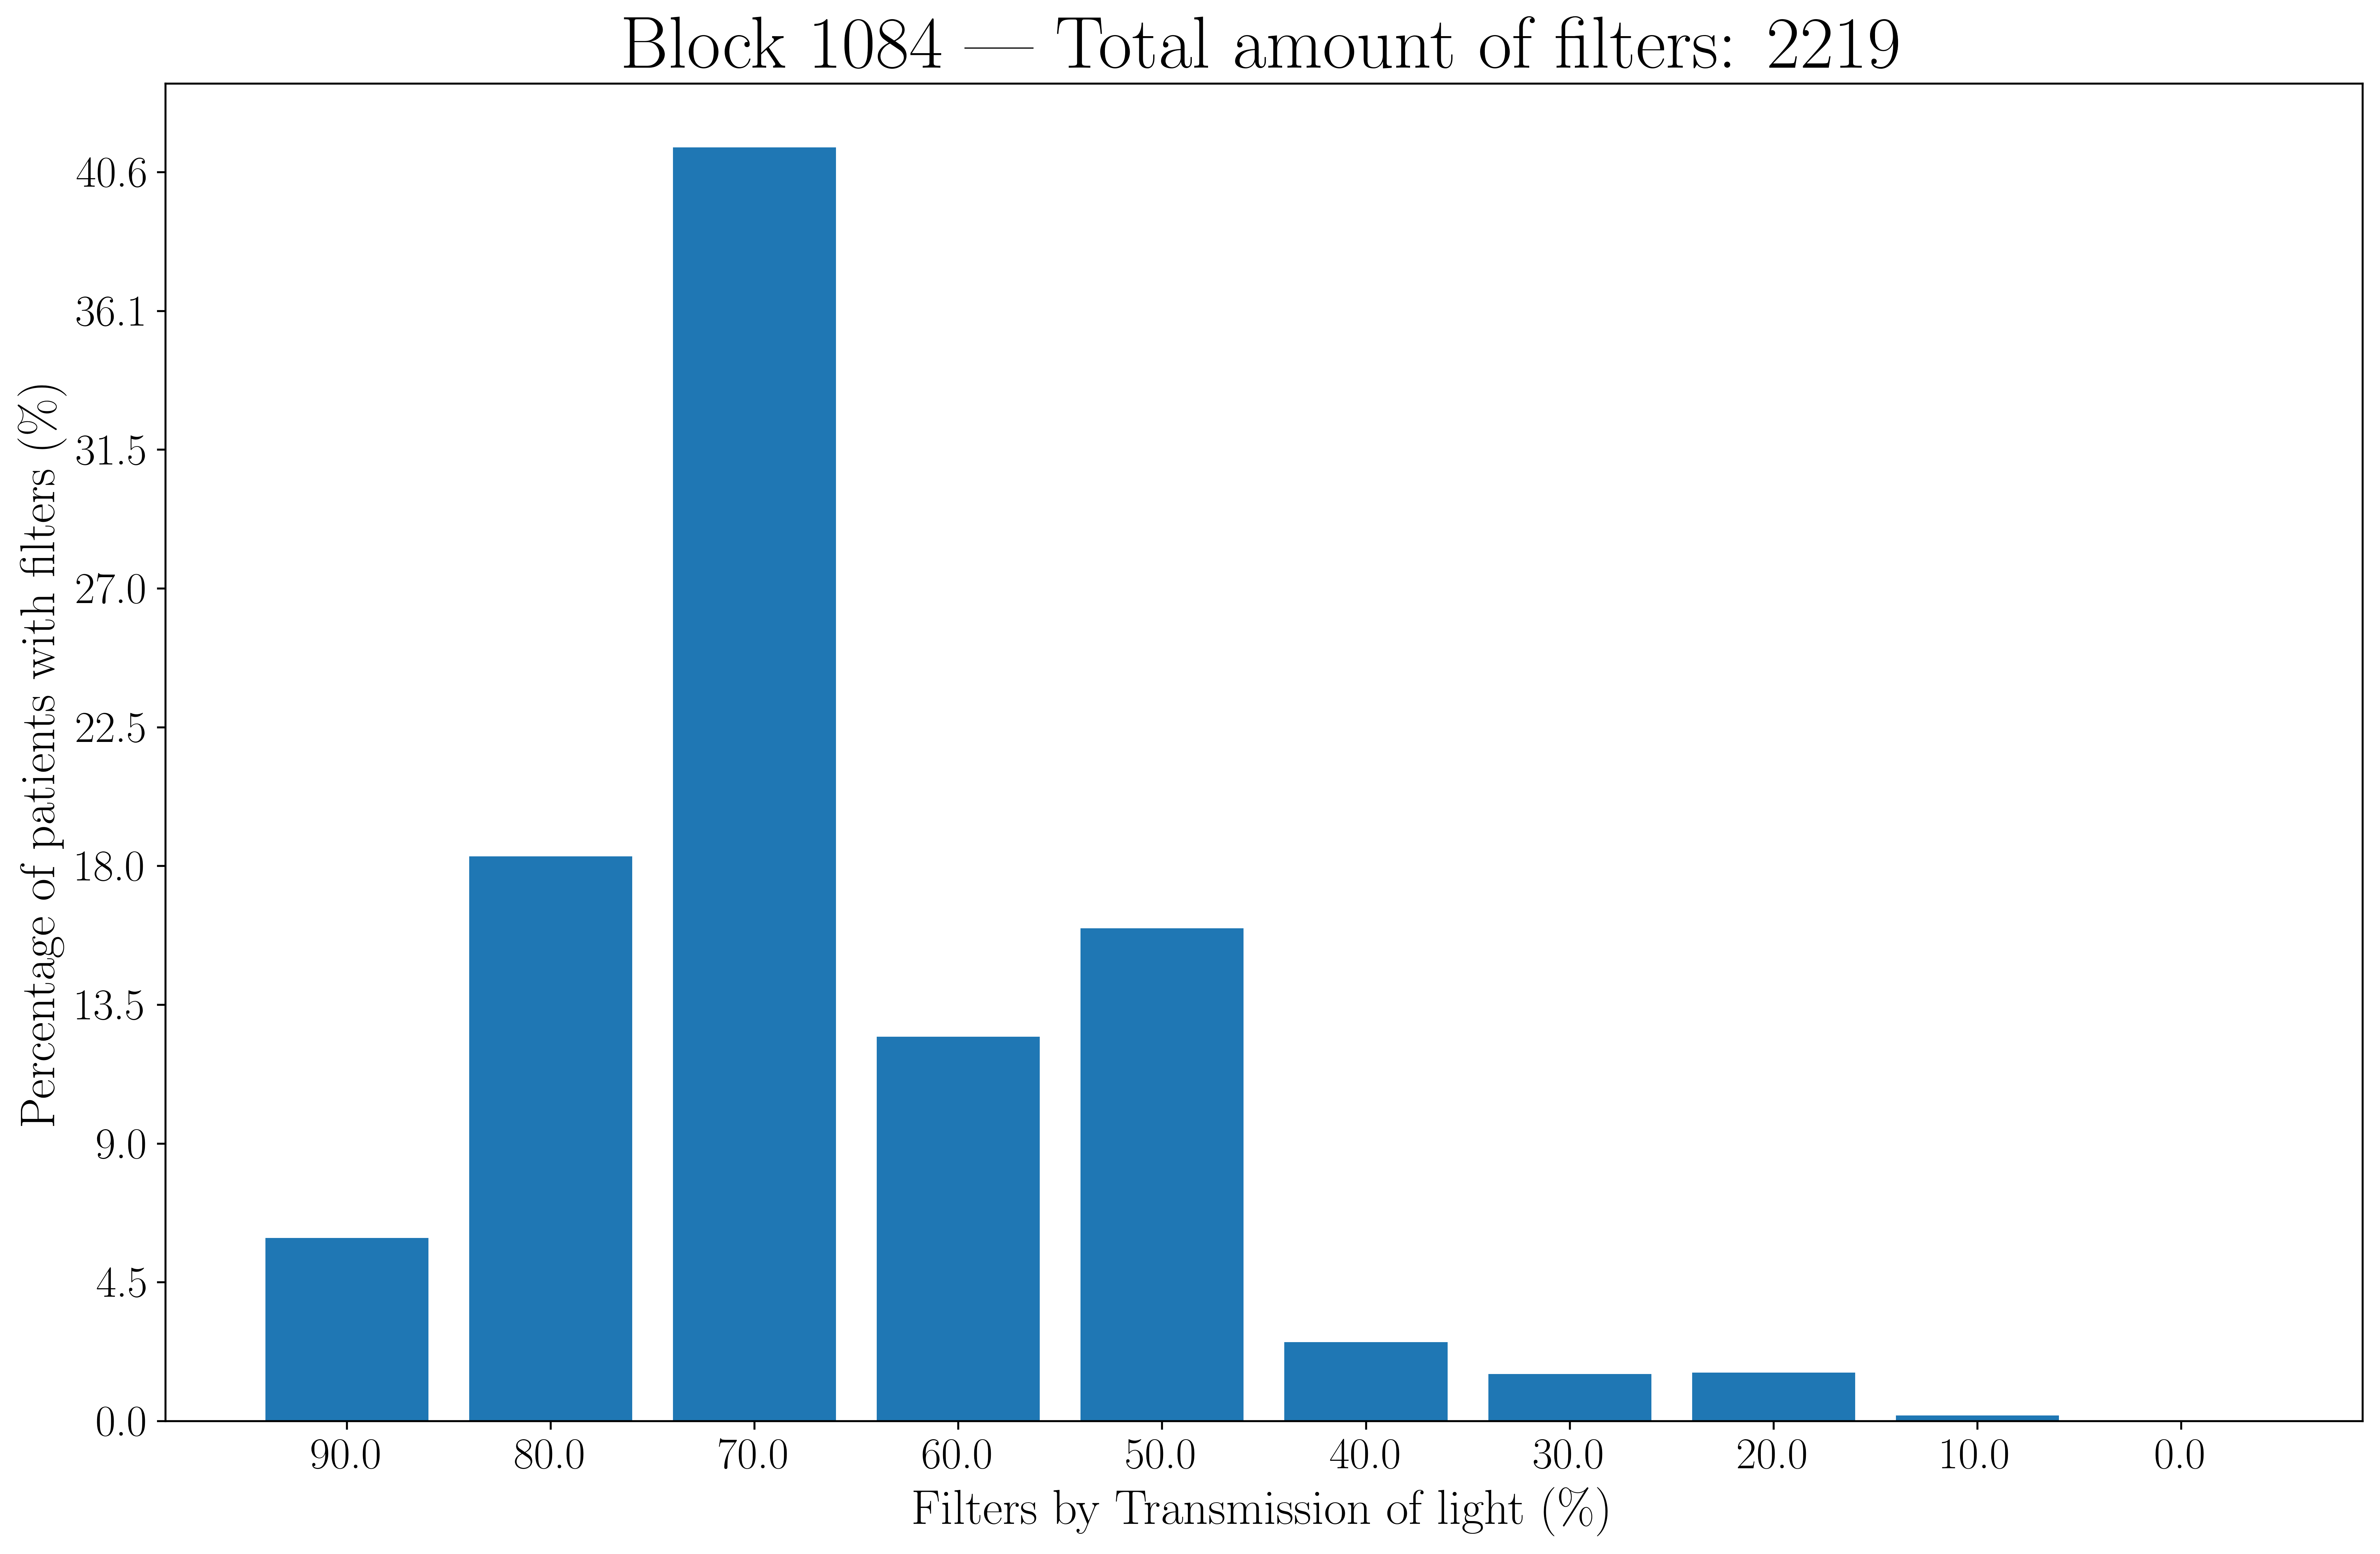

In [18]:
block = '1084'
fig, axs = plt.subplots(figsize=(16, 10), dpi=500)
bins = np.arange(0.1, 1.1, 0.1) 
custom_labels = np.round(np.arange(0.1,1.1,0.1),3)
custom_labels= (np.flip(custom_labels,)*100)-10
axs.bar(total_bins*10, counts_1084)
plt.xticks(total_bins*10, custom_labels, fontsize = 18)
plt.yticks(np.arange(0,1000,100), np.round(np.arange(0,1000,100)/sum(counts_1084)*100,1), fontsize = 18)

plt.xlabel("Filters by Transmission of light (\%) ", fontsize=20) ; plt.ylabel("Percentage of patients with filters (\%)", fontsize=20) 
plt.title(fr"Block {block}   |  Total amount of filters: {int(sum(counts_1084))}", fontsize=30);

plt.savefig(fr'{images}/Block_1/{block}_session_1.jpg', dpi=500)


## 2101

In [19]:
df_b1_2101_f, rejected_elements_2101 = extracting_and_filtering(df,'Block1 (S1)',2101,'Filter Used for Block 1 (S1)')

In [20]:
print(fr"{len(rejected_elements_2101)} elements were filtered from the 2101 block")

2 elements were filtered from the 2101 block


In [21]:
index_of_row = df_b1_2101_f.index.tolist()

for i in index_of_row: 
    try:
        if any(char in df_b1_2101_f['Filter Used for Block 1 (S1)'][i] for char in ['nd', '/','No Filter','No filter', ',','..',"'0.4'"]):
            print(fr"index {i}: {df_b1_2101_f['Filter Used for Block 1 (S1)'][i]}")
    except:
        pass


In [22]:
errors = False
for i in index_of_row: 
    try:
        float(df_b1_2101_f['Filter Used for Block 1 (S1)'][i])
    except:
        print(fr"index {i} can't be converted to float its value is {df_b1_2101_f['Filter Used for Block 1 (S1)'][i]}")
        errors = True

if errors: pass
else: 
    print('All of the values are numbers and they are now in float format for 2101')
    df_b1_2101_f['Filter Used for Block 1 (S1)'] = df_b1_2101_f['Filter Used for Block 1 (S1)'].astype(float)
    print('All of the values are numbers and they are now in float format for 2101')
    file_name = 'block1_s1_2101.csv'
    print(fr"This dataframe was stored as {file_name}")
    df_b1_2101_f.to_csv(fr"{csv}/Block_1/{file_name}",index=False)




All of the values are numbers and they are now in float format for 2101
All of the values are numbers and they are now in float format for 2101
This dataframe was stored as block1_s1_2101.csv


In [23]:
counts_2101, bins_2101 = setting_full_bins(np.array(df_b1_2101_f['Filter Used for Block 1 (S1)']).astype(float))

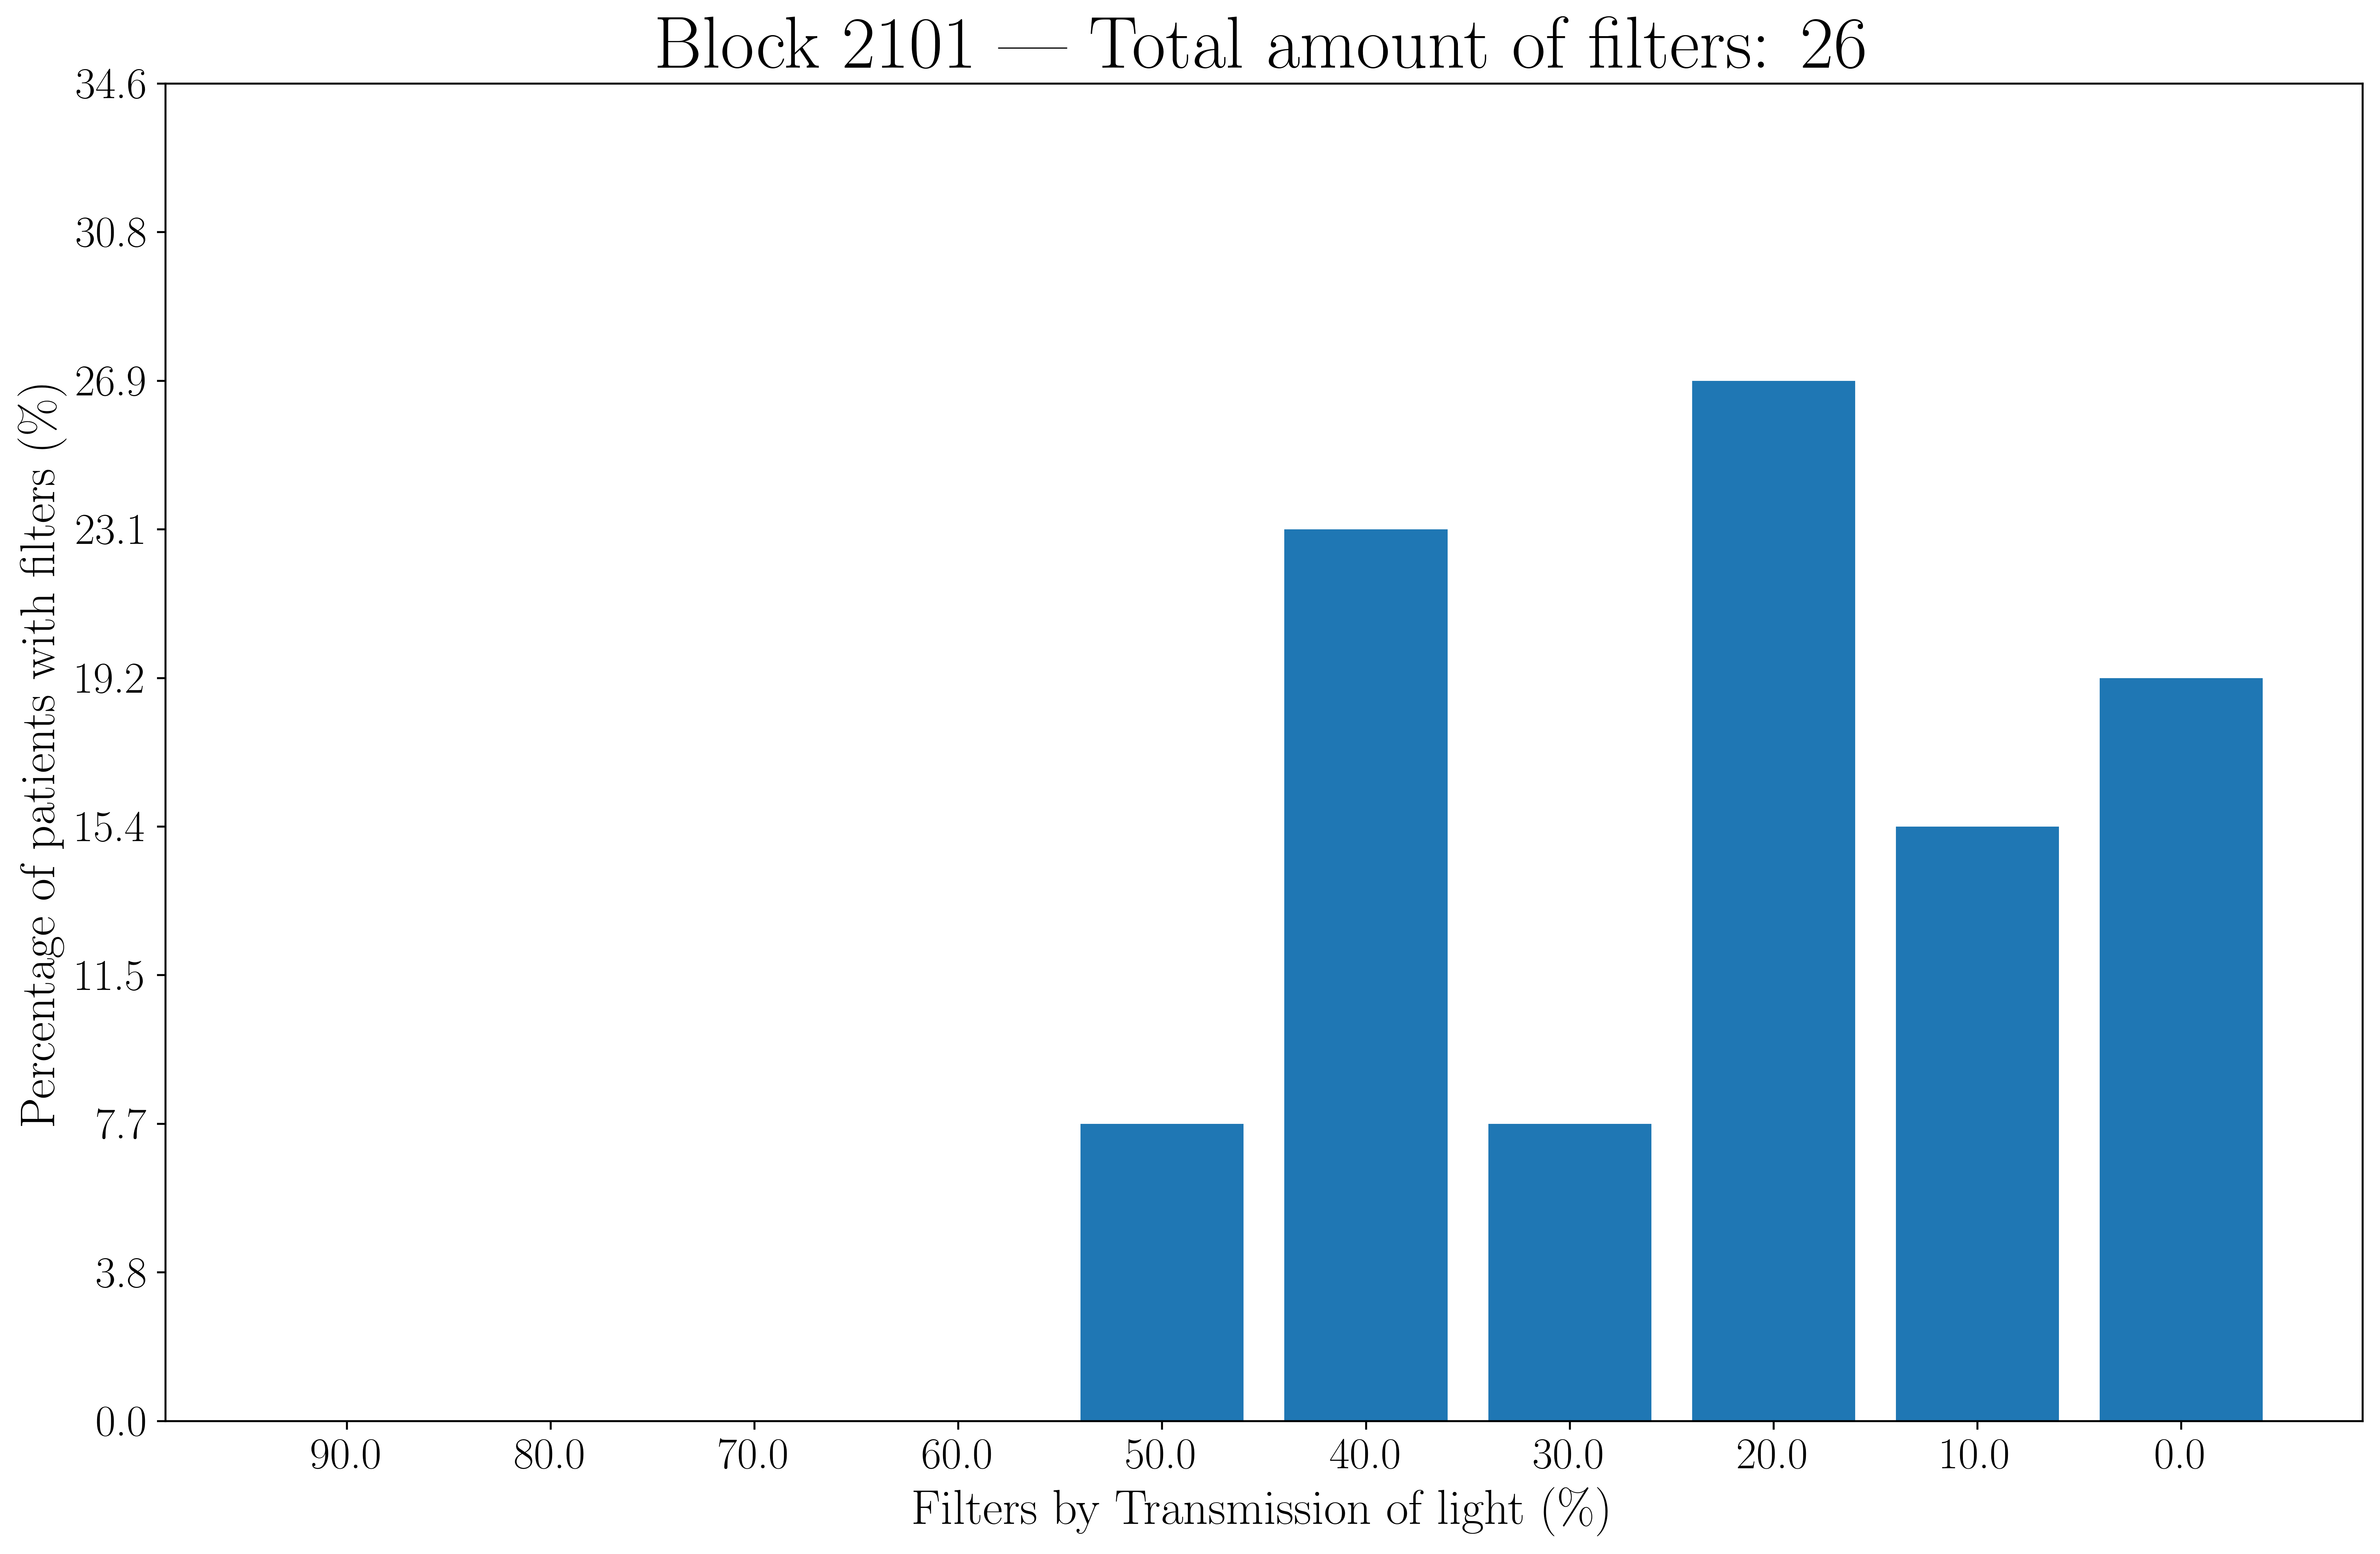

In [24]:
fig, axs = plt.subplots(figsize=(16, 10), dpi=500)
bins = np.arange(0.1, 1.1, 0.1) 
custom_labels = np.round(np.arange(0.1,1.1,0.1),3)
custom_labels= (np.flip(custom_labels,)*100)-10
axs.bar(total_bins*10, counts_2101)
plt.xticks(total_bins*10, custom_labels, fontsize = 18)
y_ticks =  np.arange(0,10,1)/sum(counts_2101)
plt.yticks(np.arange(0,10,1), np.round((y_ticks*100),1), fontsize = 18)

plt.xlabel("Filters by Transmission of light (\%) ", fontsize=20) ; plt.ylabel("Percentage of patients with filters (\%)", fontsize=20) 
plt.title(fr"Block {block}   | Total amount of filters: {int(sum(counts_2101))}", fontsize=30);

plt.savefig(fr'{images}/Block_1/{block}_session_1.jpg', dpi=500)


## Block 2

In [25]:
print('Different block names for Block 2 (S1)')
block = 2
block_column = fr'Block{block} (S{session})'
print(df[block_column].unique())

Different block names for Block 2 (S1)
[2103.0 '2103' nan '2102' '2101' 2102.0 2101.0]


In [36]:
df.loc[df[block_column] == '2103', block_column] = float(2103)
df.loc[df[block_column] == '2102', block_column] = float(2102)
df.loc[df[block_column] == '2101', block_column] = float(2101)
print('')
print(fr'Condensed Block Names for Block {block} (S{session})')
print(df[block_column].unique())


Condensed Block Names for Block 2 (S1)
[2103.0 nan 2102.0 2101.0]


In [37]:
for b in df[block_column].unique():
    print('Block name '+str(b) + ' has '+str(len(df[df[block_column]==b])) + ' rows')


Block name 2103.0 has 1841 rows
Block name nan has 0 rows
Block name 2102.0 has 439 rows
Block name 2101.0 has 20 rows


## Block name 2103

In [75]:
block_name = 2103
block_session = fr'Block{block} (S{session})'

In [76]:
df_b2_2103_f, rejected_elements = extracting_and_filtering(df,block_session,block_name,fr'Filter Used for Block {block} (S{session})')
print(fr"{len(rejected_elements)} rows were filtered for the block {block_name}")
block_session_df = df_b2_2103_f.copy()

43 rows were filtered for the block 2103


### Manual Processing

#### Looking for the exceptions

In [77]:
index_of_row = block_session_df.index.tolist()

for i in index_of_row: 
    try:
        if any(char in block_session_df[fr'Filter Used for Block {block} (S{session})'][i] for char in ['nd', '/','No Filter','No filter', ',','..',"'0.4'"]):
            print(fr"index {i}: {block_session_df[fr'Filter Used for Block {block} (S{session})'][i]}")
    except:
        pass

index 78: 0.5 nd
index 589: 0.7/0.9
index 834: 1.1/0.9/0.6ND
index 1100: No filters noted
index 1153: 0.7 Good for A, B & C, 0.3 Good forD
index 1297: 0.3, 0.7
index 1479: 0.4, 0.1
index 1496: 0.7, 0.4
index 1518: 0.5 nd
index 1576: 1.0/0.8
index 1781: No Filter
index 1800: No Filter
index 1959: 0.8, 0.4
index 1978: 0.30nd
index 2269: 0.2 nd


In [78]:
block_session_df[fr'Filter Used for Block {block} (S{session})'][78] = 0.5
block_session_df[fr'Filter Used for Block {block} (S{session})'][1153] = 0.3
block_session_df[fr'Filter Used for Block {block} (S{session})'][1518] = 0.5
block_session_df[fr'Filter Used for Block {block} (S{session})'][1548] = 0.5
block_session_df[fr'Filter Used for Block {block} (S{session})'][1978] = 0.3
block_session_df[fr'Filter Used for Block {block} (S{session})'][2269] = 0.2
block_session_df[fr'Filter Used for Block {block} (S{session})'][2269] = 0.2

#Deleting Values
block_session_df = block_session_df.drop(2274)
block_session_df = block_session_df.drop(2174)
block_session_df = block_session_df.drop(1959)
block_session_df = block_session_df.drop(1800)
block_session_df = block_session_df.drop(1781)
block_session_df = block_session_df.drop(1576)
block_session_df = block_session_df.drop(1496)
block_session_df = block_session_df.drop(1479)
block_session_df = block_session_df.drop(1297)
block_session_df = block_session_df.drop(1100)
block_session_df = block_session_df.drop(834)
block_session_df = block_session_df.drop(589)


index_of_row = block_session_df.index.tolist()

In [79]:
# Checking if all of values are numbers
errors = False
for i in index_of_row: 
    try:
        float(block_session_df[fr'Filter Used for Block {block} (S{session})'][i])
    except:
        print(fr"index {i} can't be converted to float its value is {block_session_df[fr'Filter Used for Block {block} (S{session})'][i]}")
        errors = True
    if float(block_session_df[fr'Filter Used for Block {block} (S{session})'][i]) > 1: 
        print(fr"index {i} is greater than one it's value is  {block_session_df[fr'Filter Used for Block {block} (S{session})'][i]}") 
        errors = True

if errors: pass
else: 
    block_session_df[fr'Filter Used for Block {block} (S{session})'] = block_session_df[fr'Filter Used for Block {block} (S{session})'].astype(float)
    print(fr'All of the values are numbers and they are now in float format for {block_name}')
    file_name = fr'block{block}_s{session}_{block_name}.csv'
    print(fr"This dataframe was stored as {file_name}")
    block_session_df.to_csv(fr"{csv}/Block_{block}/{file_name}",index=False)





All of the values are numbers and they are now in float format for 2103
This dataframe was stored as block2_s1_2103.csv


In [80]:
df_b2_2103_f

,Subject_ID,probe,Block1 (S1),Filter Used for Block 1 (S1),Block2 (S1),Filter Used for Block 2 (S1),Block1 (S2),Filter Used for Block 1 (S2),Block2 (S2),Filter Used for Block 2 (S2),Block1 (S3),Filter Used for Block 1 (S3),Block2 (S3),Filter Used for Block 2 (S3)
0,NC301,CCHUNB6A,1084.0,0.3,2103.0,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NC301,CCHUNB6A,1084.0,0.5,2103.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NC302,CCHUNB6A,1084.0,0.3,2103.0,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NC302,CCHUNB6A,1084.0,0.3,2103.0,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NC303,CCHUNB6A,1084.0,0.3,2103.0,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,NE300,CCHUNB6A,1084.0,0.5,2103.0,0.6,1084,0.9; 0.6,2103,1.0; 0.8,NaN,NaN,NaN,NaN
2343,NE300,CCHUNB6A,1084.0,0.2,2103.0,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2344,NE300,CCHUNB6A,1084.0,0.3,2103.0,0.3,1084,0.3,2103,0.4,NaN,NaN,NaN,NaN
2345,NE300,CCHUNB6A,1084.0,0.3,2103.0,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
counts_2103, bins_2103 = setting_full_bins(np.array(block_session_df[fr'Filter Used for Block {block} (S{session})']).astype(float))
counts= counts_2103


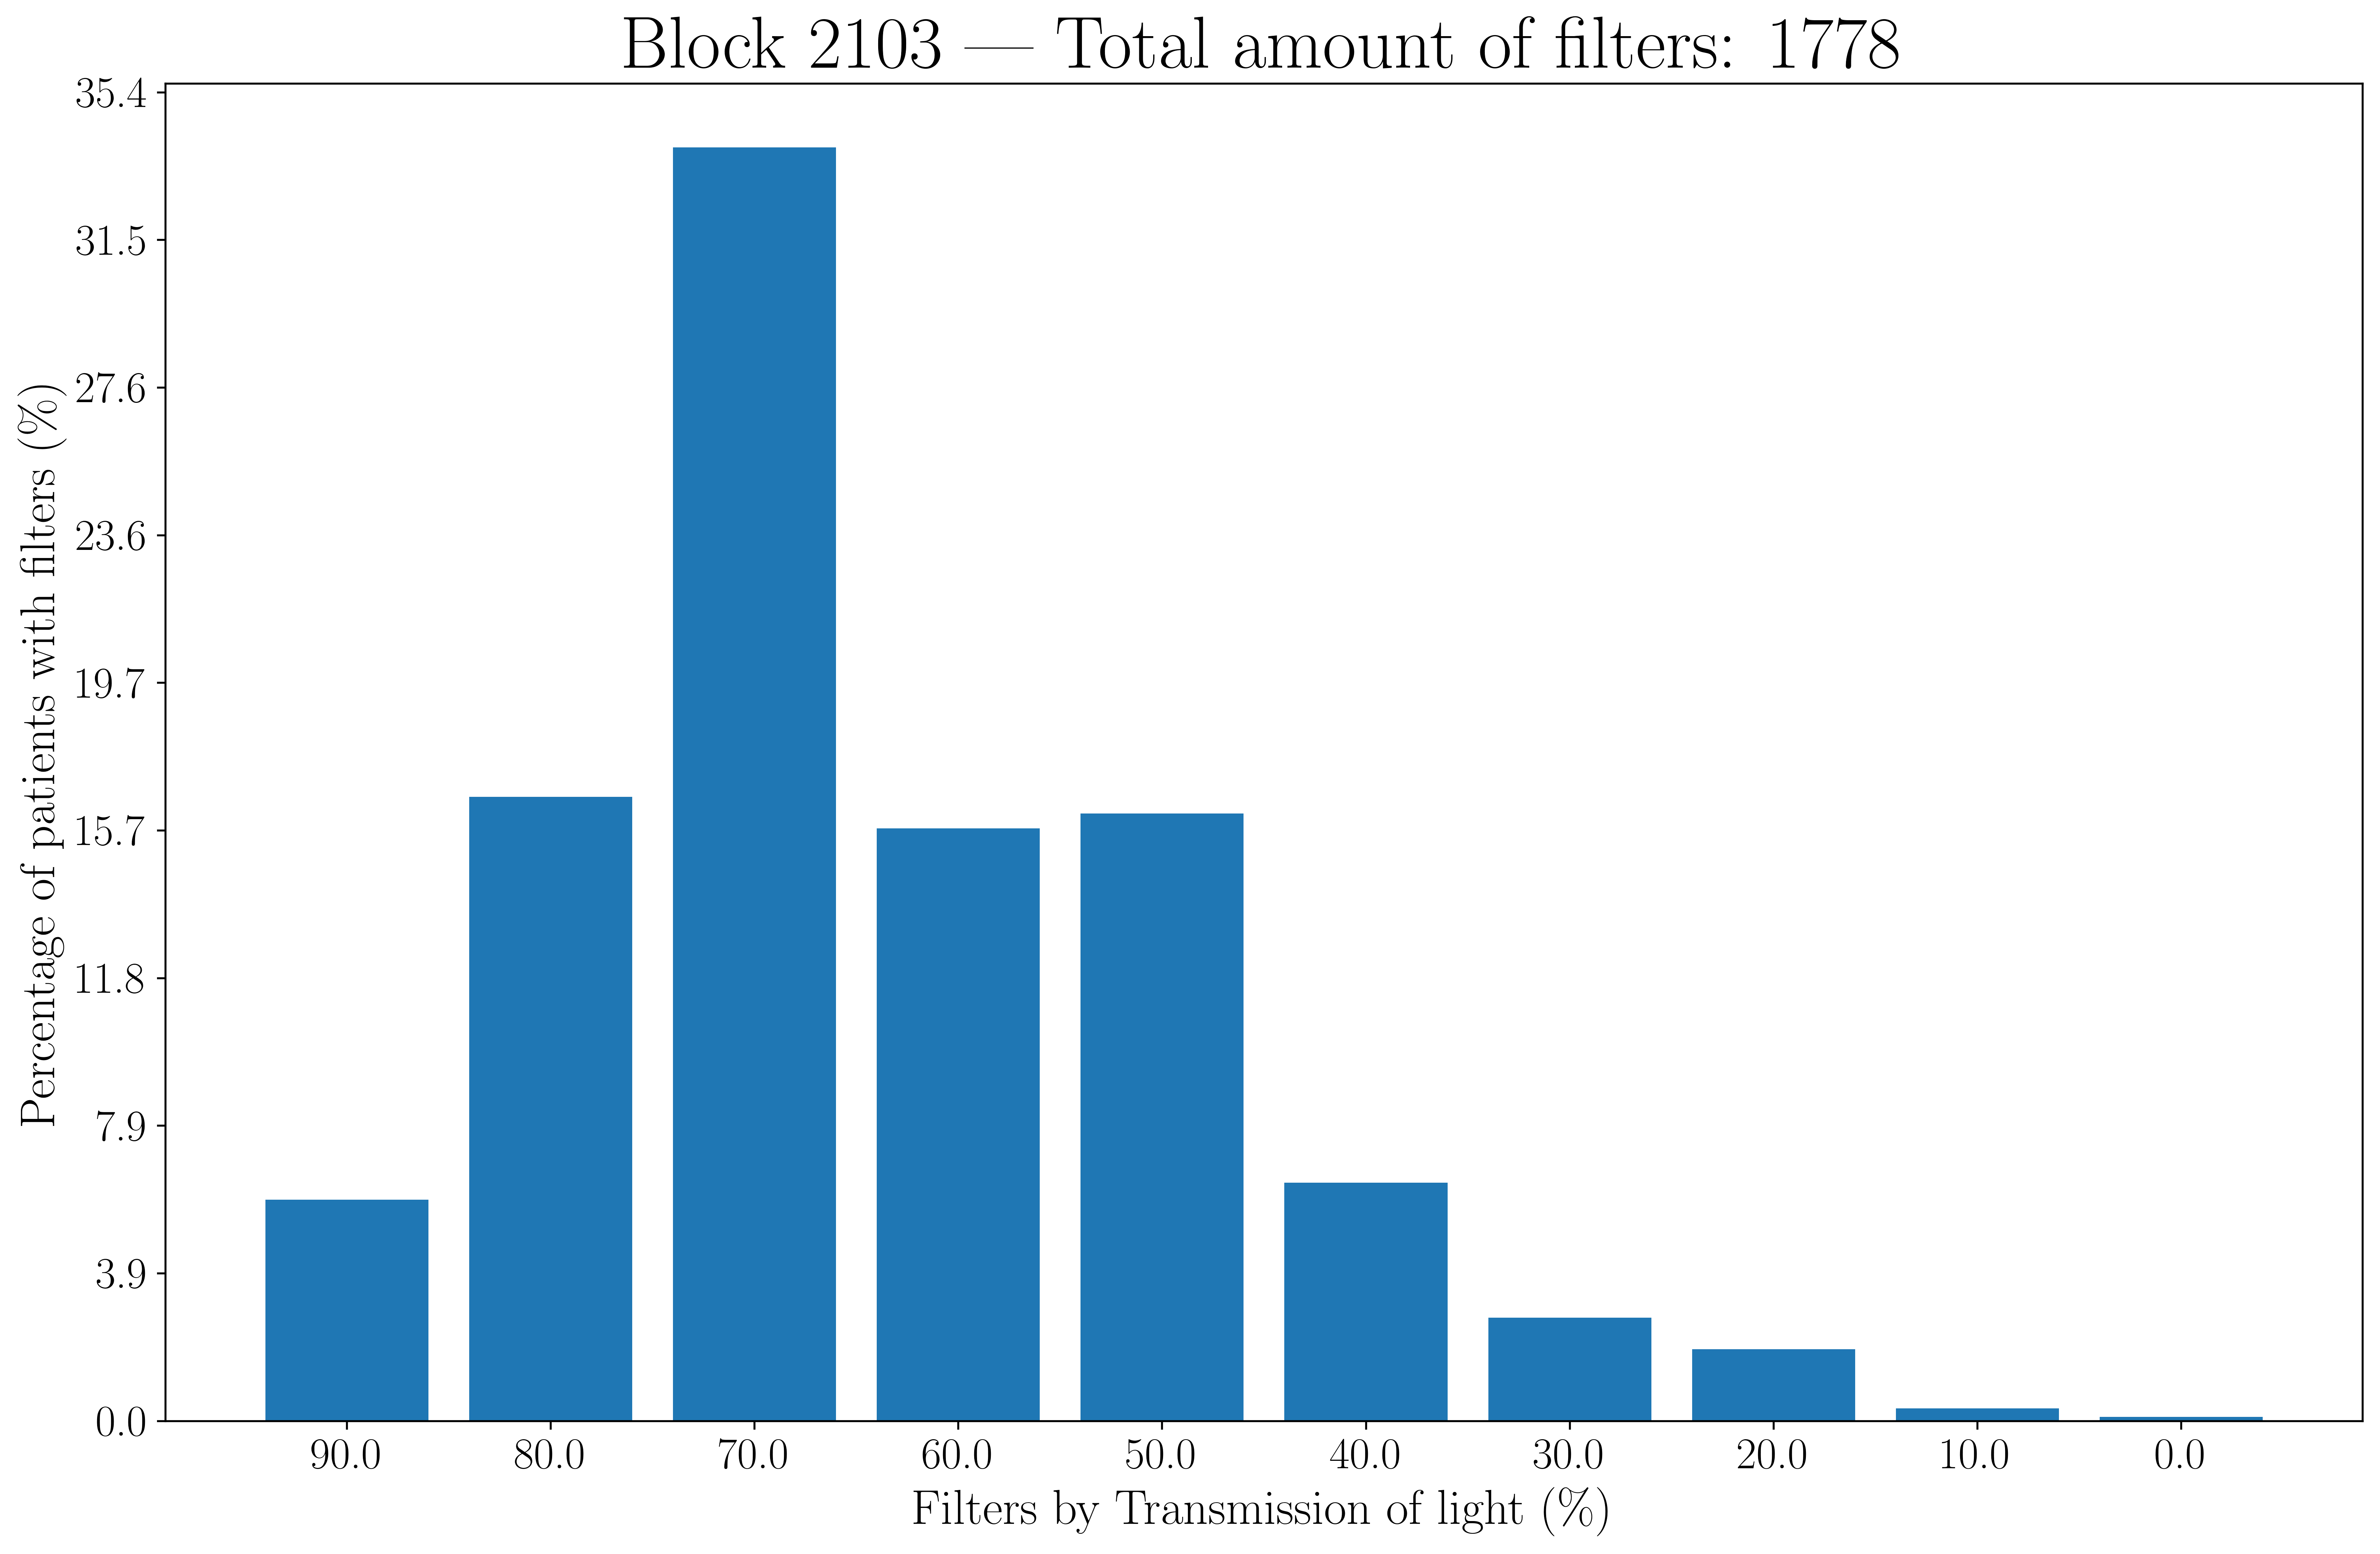

In [85]:
fig, axs = plt.subplots(figsize=(16, 10), dpi=500)
bins = np.arange(0.1, 1.1, 0.1) 
custom_labels = np.round(np.arange(0.1,1.1,0.1),3)
custom_labels= (np.flip(custom_labels,)*100)-10
axs.bar(total_bins*10, counts)
plt.xticks(total_bins*10, custom_labels, fontsize = 18)
y_ticks =  np.arange(0,700,70)/sum(counts)
plt.yticks(np.arange(0,700,70), np.round((y_ticks*100),1), fontsize = 18)

plt.xlabel("Filters by Transmission of light (\%) ", fontsize=20) ; plt.ylabel("Percentage of patients with filters (\%)", fontsize=20) 
plt.title(fr"Block {block_name}   | Total amount of filters: {int(sum(counts))}", fontsize=30);

plt.savefig(fr'{images}/Block_{block}/{block_name}_session_1.jpg', dpi=500)


## Block Name 2102

In [86]:
block_name = 2102
block_session = fr'Block{block} (S{session})'

In [87]:
df_b2_2102_f, rejected_elements = extracting_and_filtering(df,block_session,block_name,fr'Filter Used for Block {block} (S{session})')
print(fr"{len(rejected_elements)} rows were filtered for the block {block_name}")
block_session_df = df_b2_2102_f.copy()

3 rows were filtered for the block 2102


### Manual Processing

### Looking for exceptions

In [90]:
index_of_row = block_session_df.index.tolist()

for i in index_of_row: 
    try:
        if any(char in block_session_df[fr'Filter Used for Block {block} (S{session})'][i] for char in ['nd', '/','No Filter','No filter', ',','..',"'0.4'"]):
            print(fr"index {i}: {block_session_df[fr'Filter Used for Block {block} (S{session})'][i]}")
    except:
        pass

In [89]:
block_session_df = block_session_df.drop(542)

In [91]:
# Checking if all of values are numbers
errors = False
for i in index_of_row: 
    try:
        float(block_session_df[fr'Filter Used for Block {block} (S{session})'][i])
    except:
        print(fr"index {i} can't be converted to float its value is {block_session_df[fr'Filter Used for Block {block} (S{session})'][i]}")
        errors = True
    if float(block_session_df[fr'Filter Used for Block {block} (S{session})'][i]) > 1: 
        print(fr"index {i} is greater than one it's value is  {block_session_df[fr'Filter Used for Block {block} (S{session})'][i]}") 
        errors = True

if errors: pass
else: 
    block_session_df[fr'Filter Used for Block {block} (S{session})'] = block_session_df[fr'Filter Used for Block {block} (S{session})'].astype(float)
    print(fr'All of the values are numbers and they are now in float format for {block_name}')
    file_name = fr'block{block}_s{session}_{block_name}.csv'
    print(fr"This dataframe was stored as {file_name}")
    block_session_df.to_csv(fr"{csv}/Block_{block}/{file_name}",index=False)





All of the values are numbers and they are now in float format for 2102
This dataframe was stored as block2_s1_2102.csv


In [92]:
counts_2102, bins_2102 = setting_full_bins(np.array(block_session_df[fr'Filter Used for Block {block} (S{session})']).astype(float))
counts= counts_2102


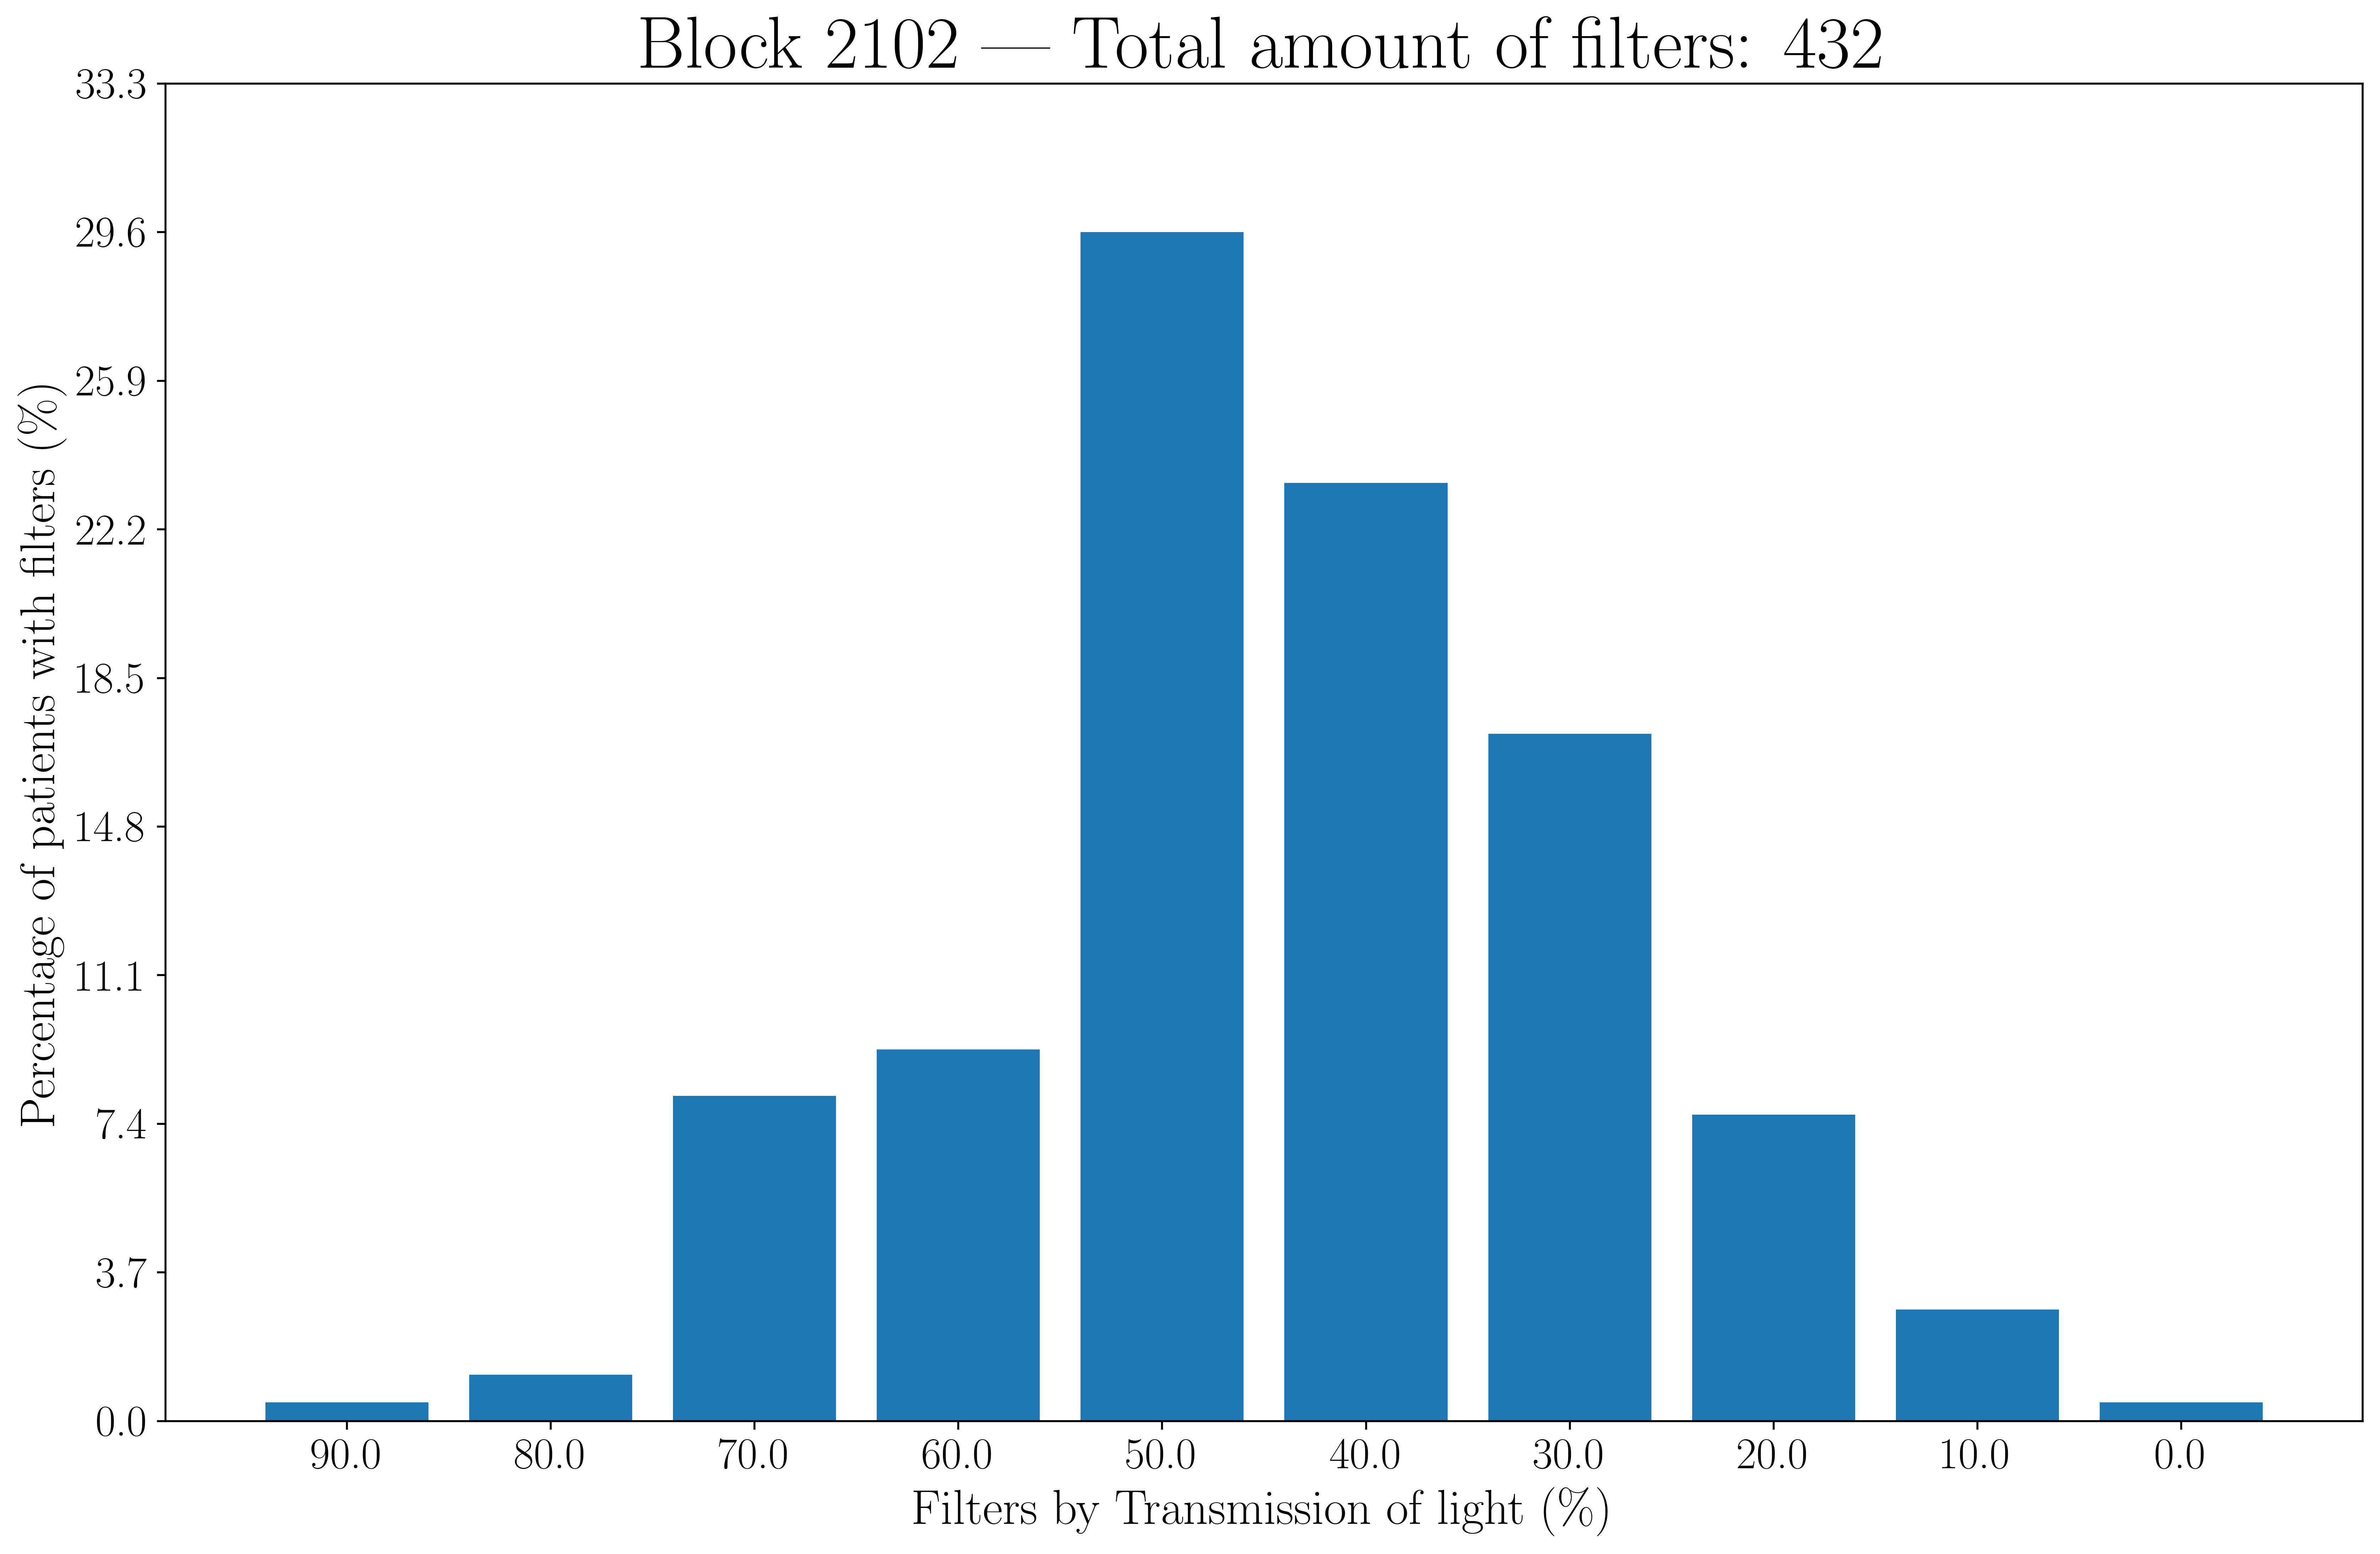

In [98]:
fig, axs = plt.subplots(figsize=(16, 10), dpi=500)
bins = np.arange(0.1, 1.1, 0.1) 
custom_labels = np.round(np.arange(0.1,1.1,0.1),3)
custom_labels= (np.flip(custom_labels,)*100)-10
axs.bar(total_bins*10, counts)
plt.xticks(total_bins*10, custom_labels, fontsize = 18)
y_ticks =  np.arange(0,160,16)/sum(counts)
plt.yticks(np.arange(0,160,16), np.round((y_ticks*100),1), fontsize = 18)

plt.xlabel("Filters by Transmission of light (\%) ", fontsize=20) ; plt.ylabel("Percentage of patients with filters (\%)", fontsize=20) 
plt.title(fr"Block {block_name}   | Total amount of filters: {int(sum(counts))}", fontsize=30);

plt.savefig(fr'{images}/Block_{block}/{block_name}_session_1.jpg', dpi=500)
